# Algorytmika i matematyka uczenia maszynowego 
## Laboratorium 3

Do wykonania laboratorium należy skorzystać z bibliotek:
- [numpy](https://numpy.org/)
- [matplotlib](https://matplotlib.org/)

### Zadanie 1 - zakupy

W sklepie dostępne są następujące produkty:

| Produkt | Cena (netto) | Podatek |
| --- | --- | --- |
| Chleb | 3 | 5% |
| Butelka wody (1l) | 2 | 8% |
| Pomidor 1szt. | 2 | 5% |
| Olej (1l) | 6 | 5% |
| Szafran | 24.5 | 8% |
| Krewetki (opakowanie) | 20 | 23% |
| Lód (opakowanie) | 5 | 23% |


#### Zadanie 1 A

Zapisz:
- nazwy produktów w zmiennej `N`.
- ceny produktów w zmiennej `C`.
- stawki podatku w zmiennej `P`.

*(powyższe zmienne to tablice jednowymiarowe)*



In [10]:

import numpy as np 
import matplotlib.pyplot as plt
# N = np.array(['Chleb', 'Woda 1L', 'Pomidor', 'Olej 1L', 'Szafran', 'Krewetki', 'Lod'])
# P = np.array([0.05, 0.08, 0.05, 0.05, 0.08, 0.23, 0.23])
# C = np.array([3, 2, 2, 6, 24.5, 20, 5])
N, P, C = [], [], []
# with open('produkty.csv', mode='r') as file:
#     csv_reader = csv.reader(file)
#     for row in csv_reader:
#         N.append(row[0])
#         P.append(row[1])
#         C.append(row[2])
data = np.genfromtxt('produkty.csv', delimiter=',', dtype=str)
N = np.array(data[:, 0])
P = np.array(data[:, 2])
P = P.astype(float)
C = np.array(data[:, 1])
C = C.astype(float)
print(P)

[0.05 0.08 0.23 0.05 0.08]


#### Zadanie 1 B

Klient kupił:

- 2 szt. chleba, 
- 6 butelek wody,
- 1 opakowanie krewetek.

Zapisz zakupy klienta w wektorze `Z` (zachowaj wymiarowość) oraz kolejność produktów zgodnie z zad. 1A.

In [11]:
# Z = np.array([2, 6, 0, 0, 0, 1, 0])
Z = np.array(np.genfromtxt('zakupy.csv', delimiter=',', dtype=str))
Z = Z.astype(float)
print(Z)

[2. 1. 0. 0. 1.]



#### Zadanie 1C

Oblicz sumę **netto** jaką klient musi zapłacić bez używania:
- operatora `+`, 
- funkcji/metody `sum`
- operatego mnożenia skalarnego (`*`, `__mul__`).

_Podpowiedź: jeden z wektorów trzeba transponować_

In [12]:
# cost = (C*np.transpose(Z))
# netto = cost - cost*np.transpose(P)
# netto = sum(netto)
netto = C @ Z
netto

24.0

#### Zadanie 1D

Oblicz wartość **brutto** jaką klient musi zapłacić w sklepie. 

* W tym zadaniu użyj operatora `*` do obliczenia cen brutto.
* Do obliczenia sumy użyj operatora mnożenia macierzy (podobnie jak w zad. 1C).
* Dodatkowo, wyświetl rachunek w postaci tabeli zawierającej kolumny: 
    - nazwa produktu,
    - cena netto, 
    - liczba sztuk, 
    - cena netto danej pozycji (cena netto x liczba sztuk), 
    - podatek (procentowo np. `5%`),
    - cena brutto danej pozycji. 

Na końcu tabeli ma się wyświetlić suma brutto do zapłaty.

**Oczekiwany wynik:**
```
Nazwa                       cena x szt.  netto   podatek   brutto
Chleb                       3.00 x 2      6.00        5%    ?????
Butelka wody (1l)           2.00 x 6     12.00        8%    ?????
Krewetki (opakowanie)      24.50 x 1     24.50       23%    ?????
=================================================================
Suma:                                                       ?????
```

_(w miejscu znaków zapytania powinny być wartości liczbowe)_

In [13]:
headers = ['Nazwa', 'cena x szt.', 'netto', 'podatek', 'brutto']
brutto = Z*(100*C)/(100-100*P)
N2 = N[Z != 0]

cena = C[Z != 0]
# szt = [2, 1, 1]
szt = Z[Z != 0]
cena_szt = [str(cenaa) + ' x ' + str(sztuka) for cenaa, sztuka in zip(cena, szt)]

netto2 = C*Z
netto2 = netto2[Z != 0]

P2 = 100*P[Z != 0]
P2 = [str(int(it)) + '%' for it in P2]


brutto2 = brutto[Z != 0]
brutto2 = [round(element, 2) for element in brutto2]
brutto_suma = sum(brutto2)
suma_list = ['Suma:', brutto_suma]

interleaved_list = np.array([item for sublist in zip(N2, cena_szt, netto2, P2, brutto2) for item in sublist])
interleaved_matrix = interleaved_list.reshape(3, 5)


header_format = '{:<13}' * 5
row_format = '{:<13}' * 5
sum_format = '{:<52}' * 2

# Print headers
print(header_format.format(*headers))

# Print data
for row in interleaved_matrix:
    print(row_format.format(*row))
print('=' * 57)
print(sum_format.format(*suma_list))


Nazwa        cena x szt.  netto        podatek      brutto       
Skyr         3.0 x 2.0    6.0          5%           6.32         
Maslo        8.0 x 1.0    8.0          8%           8.7          
Herbata      10.0 x 1.0   10.0         8%           10.87        
Suma:                                               25.89                                               


### Zadanie 2

Zmodyfikuj kod z zadania pierwszego w ten sposób, że dane o produktach będą wczytywane z pliku `produkty.csv`, a dane do rachunku (liczba zakupionych produktów) z pliku `rachunek.csv`.

Utwórz przykładowe dane (inne niż w zadaniu 1). Minimum 5 produktów.


### Zadanie 3

#### Zadanie 3 A

Utwórz dwa wektory dwuelementowe `A` i `B` (dowolne wartości dodatnie).

Następnie wykonaj sumowanie elementów obu wektorów i zapisz w zmiennej `C`.


In [14]:
class Vector():
    def __init__(self, cordinates):
        self.coordinates = cordinates
    def __add__(self, vector2):
        if len(self.coordinates) == len(vector2.coordinates):
            return [i + j for i,j in zip(self.coordinates, vector2.coordinates)]
        else:
            print('Different sizes')

In [15]:
vector1 = Vector([1, 2])
vector2 = Vector([2, 3])
C = vector1 + vector2
C

[3, 5]

#### Zadanie 3 B

Wyświetl na wykresie:
- wektor wodzący (strzałkę) z punktu `(0, 0)` do punktów `A` oraz `B` (w kolorze <font color='green'>zielonym</font>),
- wektor wodzący z punktu `(0, 0)` do punktu `C` (w kolorze <font color='red'>czerwonym</font>)
- wektor wodzący z punktu `A` do punktu `C` (w kolorze <font color='blue'>niebieskim</font>),
- wektor wodzący z punktu `B` do punktu `C` (w kolorze <font color='blue'>niebieskim</font>).

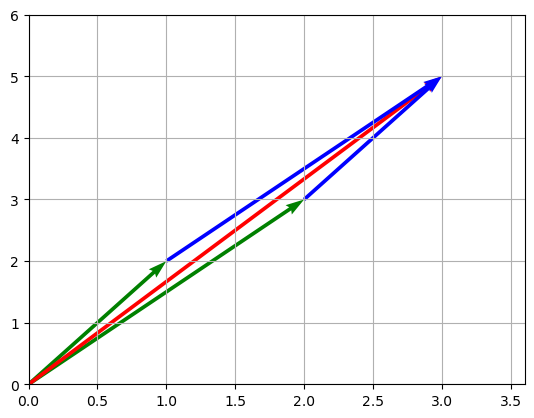

In [16]:
_, ax = plt.subplots()
ax.quiver(0, 0, vector1.coordinates[0], vector1.coordinates[1], angles='xy', scale_units='xy', scale=1, color='green')
ax.quiver(0, 0, vector2.coordinates[0], vector2.coordinates[1], angles='xy', scale_units='xy', scale=1, color='green')
ax.quiver(0, 0, C[0], C[1], angles='xy', scale_units='xy', scale=1, color='red')
ax.quiver(vector1.coordinates[0], vector1.coordinates[1], C[0] - vector1.coordinates[0], C[1] - vector1.coordinates[1], angles='xy', scale_units='xy', scale=1, color='blue')
ax.quiver(vector2.coordinates[0], vector2.coordinates[1], C[0] - vector2.coordinates[0], C[1] - vector2.coordinates[1], angles='xy', scale_units='xy', scale=1, color='blue')
ax.set_xlim([0, 1.2*C[0]])
ax.set_ylim([0, 1.2*C[1]])
plt.grid()
plt.show()

### Zadanie 4

Wygeneruj losową macierz 8×8 wg rozkładu Gaussa (średnia: 100, odch. std = 15),
wartości zaokrąglij do liczb całkowitych (int). Macierz ta reprezentuje pewien obraz (w skali szarości).

Następnie zastosuj filtr uśredniający o masce 3×3 dla elementów wewnętrznych tej macierzy i wypisz wynik. W filtrze uśredniającym zastosuj zaokrąglanie w dół do liczby całkowitej.

_Podpowiedź: generacja danych: np.random.normal, np.round._

In [17]:
mean = 100
std_dev = 15

random_matrix = np.random.normal(mean, std_dev, size=(8, 8))

random_matrix = np.round(random_matrix).astype(int)

print(random_matrix)
filtered_matrix = np.zeros((6, 6), dtype=int)
for i in range(6):
    for j in range(6):
        part_matrix = random_matrix[i:i+3, j:j+3]
        #print(np.sum(part_matrix) / 9)
        filtered_matrix[i, j] = np.sum(part_matrix) / 9
        #print(filtered_matrix)
print(f'\n\n{filtered_matrix}')

[[ 98 117 103  93 105  94 118 112]
 [127 120 117  89  98  99 120  84]
 [ 99 104  89 105 127 105 109  79]
 [ 87  95  82 133  84  94  83 113]
 [114  86 106  81 103  85 136  97]
 [ 78 130  91  85  90 135  90 116]
 [ 98  92  93  93  70  94 100 111]
 [122  83 117 114 101 110  93 107]]


[[108 104 102 101 108 102]
 [102 103 102 103 102  98]
 [ 95  97 101 101 102 100]
 [ 96  98  95  98 100 105]
 [ 98  95  90  92 100 107]
 [100  99  94  99  98 106]]
